## Signal Testing in SPY index trading
Spy aims to keep track of S&P 500 index, keeping track of a number of large and mid cap US equities. We aim to find signals to guide us timing in market entry and exit. Here's some of my hypothesis and signal sources:
- Currency: Strong dollar -> sign of market decline -> sources signal from UUP (Invesco DB US Dollar Index Bullish Fund)
- Commodity: Market value drop -> leading indicator to market worries (Invesco DB Base Metals Fund)
- Debt market: Equity market value benefit from cheaper bond (sources signal from BSV, short term bond Vanguard Short-Term Bond ETF)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
#Reading in possible indexes from Jan/2010 to Sep/2020
spy_data = pd.read_csv("data/SPY.csv", index_col = 'Date')
spy_price = spy_data['Close']
UUP_data = pd.read_csv("data/UUP.csv", index_col = 'Date')
UUP_price = UUP_data['Close']
BSV_data = pd.read_csv("data/BSV.csv", index_col = 'Date')
BSV_price = BSV_data['Close']
DBB_data = pd.read_csv("data/DBB.csv", index_col = 'Date')
DBB_price = DBB_data['Close']
JJM_data = pd.read_csv("data/JJM.csv", index_col = 'Date')
JJM_price = JJM_data['Close']
SHY_data = pd.read_csv("data/SHY.csv", index_col = 'Date')
SHY_price = SHY_data['Close']
#Commodity signal test
alu_future_data = pd.read_csv("data/alu_future.csv", index_col = 'Date')
alu_future_price = alu_future_data['Close']
cu_future_data = pd.read_csv("data/cu_future.csv", index_col = 'Date')
cu_future_price = cu_future_data['Close']

### Testing commodity signal correlation:
- Top two industrial broad metal fund by volume: DBB and JJM
- Testing their correlation to industrial metals future contracts

In [3]:
Test_commodity = pd.concat([DBB_price,JJM_price,alu_future_price,cu_future_price], axis=1, sort=False, join='inner')
Test_commodity.columns.values[0] = 'DBB'
Test_commodity.columns.values[1] = 'JJM'
Test_commodity.columns.values[2] = 'alu_future'
Test_commodity.columns.values[3] = 'cu_future'
Test_commodity.head()

,DBB,JJM,alu_future,cu_future
Date,,,,
2019-10-21,15.16,44.208000,1744.0,2.6350
2019-10-22,15.09,44.396999,1727.5,2.6220
2019-10-23,15.22,44.396999,1742.0,2.6625
2019-10-24,15.26,44.869999,1735.0,2.6590
2019-10-25,15.38,45.095001,1740.5,2.6665


In [4]:
corr_commodity = Test_commodity.corr()
corr_commodity

,DBB,JJM,alu_future,cu_future
DBB,1.000000,0.993622,0.926301,0.877370
JJM,0.993622,1.000000,0.908479,0.900709
alu_future,0.926301,0.908479,1.000000,0.755092
cu_future,0.877370,0.900709,0.755092,1.000000


Both DBB and JJM has high correlation to the price of future contract and should be consider as possible sources (backtest both and use the higher).

### Finding level of benchmark
- Observe 90 days return of DBB
- Set lower quartile or even low as benchmark

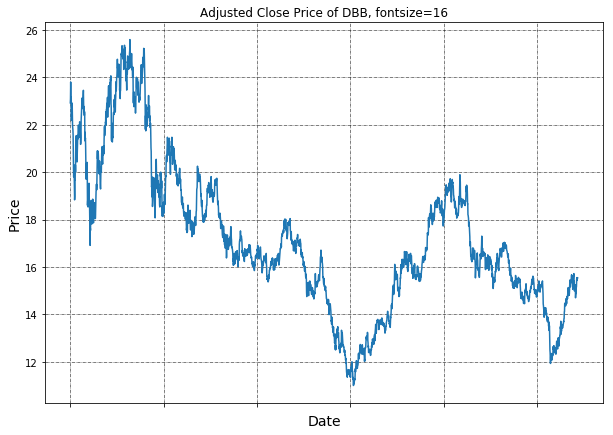

In [5]:
DBB_data['Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of DBB, fontsize=16")
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [1]:
#for some reason my Jupyter takes forever to compute 60 days return average
#I do this in excel and find lower quartile is around 7-8%